In [14]:
import numpy as np

In [28]:
def distEuclin(point, centroids, distances=0):
    distancias = np.zeros((centroids.shape[0],1))
    for counter in range(0, centroids.shape[0]):
        distancias[counter] = np.linalg.norm(point - centroids[counter])
    return distancias

In [29]:
point = np.array([1, 2])
centroids = np.array([
    [2,2],
    [-2,9],
    [-2,0],
    [0,0],
    [-3,-1]
])
distEuclin(point, centroids, 1)

array([[1.        ],
       [7.61577311],
       [3.60555128],
       [2.23606798],
       [5.        ]])

In [33]:
def centroideCercano(muestra, listaCentroides):
    listaDistancias = distEuclin(muestra, listaCentroides)
    return np.argmin(listaDistancias)

In [34]:
print("El centroide más cercano es:" + str(centroideCercano(point, centroids)))

El centroide más cercano es:0


In [39]:
def clasificaPorCentroides(points, centroids):
    resultado = np.zeros(points.shape[0], 1)
    for counter in range(0, muestras.shape[0]):
        resultado[counter] = centroideCercano(points[counter], centroides)
    return resultado

In [40]:
points = np.array([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
])
centroides = np.array([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
])

print("Clasificando por centroides" + str(clasificaPorCentroides(points, centroides)))

TypeError: Cannot interpret '1' as a data type

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

/home/soyyo/ML-BEDU/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


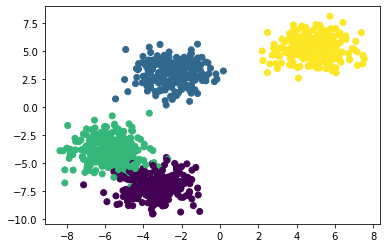

In [43]:
x,y = make_blobs(n_samples=1000, centers=4, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [46]:
modelo_kmeans = KMeans(n_clusters=4).fit(x_train)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[-3.35289411 -7.02696996]
 [-2.42957291  3.05658434]
 [ 4.87771879  5.38805902]
 [-5.82721113 -3.8733796 ]]


In [47]:
from scipy import stats

In [48]:
def obtenerModa(resultados):
    moda = (stats.mode(resultados)[0]).reshape(-1)
    return moda[0]

In [52]:
def separarDatos(points, valoresEsperados, valorAFiltrar):
    indices = np.where(valoresEsperados == valorAFiltrar)
    return points[indices], valoresEsperados[indices]
    

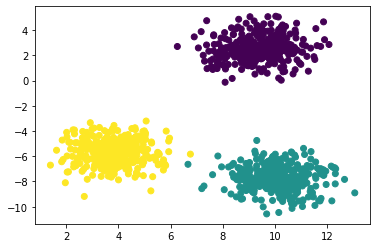

In [53]:
x,y = make_blobs(n_samples=1000, centers=3, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [54]:
muestrasCon1, valoresEsperadosCon1 = separarDatos(x,y,1)
print(valoresEsperadosCon1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [59]:
def obtenerAccuracy_kmedias(points, centroides):
    nummuestras = points.shape[0]
    
    resultados = clasificaPorCentroides(points, centroides)
    moda = obtenerModa(resultados)
    
    indicesErrores = np.where(resultados != moda)
    cantidadErrores = len(resultados[indicesErrores])
    accuracy = ((nummuestras - cantidadErrores)/nummuestras)*100
    
    return accuracy

In [60]:
centroidesDummy = np.array([[-4, -9], [-5, -10]])
accuracy = obtenerAccuracy_kmedias(muestrasCon1, centroidesDummy)
print(accuracy)

TypeError: Cannot interpret '1' as a data type